In [1]:
# Data Manipulation libraries:
import numpy as np
import pandas as pd
from copy import deepcopy

# Plotting libraries
import mplsoccer
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.projections import get_projection_class
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [30]:
eventsPassDataLaLiga2019 = pd.read_csv("data/matchwise_events_data_updated.csv",
                                      low_memory=False)

In [34]:
eventsPassDataLaLiga2019[['type.name','type.id']].drop_duplicates()

,type.name,type.id
0,Starting XI,35
2,Half Start,18
4,Pass,30
5,Ball Receipt*,42
8,Carry,43
39,Pressure,17
42,Dribble,14
43,Duel,4
87,Foul Committed,22
88,Foul Won,21


In [35]:
eventsPassDataLaLiga2019 = eventsPassDataLaLiga2019[eventsPassDataLaLiga2019['type.id'] == 30]

In [36]:
eventsPassDataLaLiga2019.groupby(['player.id']).agg({"player.name":"first",
                                                    "team.name":"first",
                                                    "type.id":"count",
                                                    "pass.outcome.id":lambda x : (x.isnull()).sum()})

,player.name,team.name,type.id,pass.outcome.id
player.id,,,,
2948.0,Nabil Fekir,Real Betis,17,14.0
3042.0,Mikel Merino Zazón,Real Sociedad,101,89.0
3058.0,Javier Hernández Balcázar,Sevilla,7,5.0
3122.0,Yannis Salibur,Mallorca,7,7.0
3139.0,Chidozie Collins Awaziem,Leganés,19,15.0
...,...,...,...,...
32953.0,Asier Villalibre Molina,Athletic Bilbao,2,2.0
34515.0,Fernando Niño Rodriguez,Villarreal,7,5.0
40881.0,Enrique Pérez Muñoz,Real Valladolid,41,39.0


In [37]:
totPassData = eventsPassDataLaLiga2019.groupby(['player.id']).agg({"player.name":"first",
                                                    "team.name":"first",
                                                    "type.id":"count",
                                                    "pass.outcome.id":lambda x : (x.isnull()).sum()})

In [38]:
totPassData.rename(columns={"type.id": "totPasses",
                            "pass.outcome.id": "succPasses"},
                  inplace=True)

In [39]:
totPassData["passAccuracy"] = totPassData["succPasses"].divide(totPassData["totPasses"])

In [40]:
totPassData.head()

,player.name,team.name,totPasses,succPasses,passAccuracy
player.id,,,,,
2948.0,Nabil Fekir,Real Betis,17,14.0,0.823529
3042.0,Mikel Merino Zazón,Real Sociedad,101,89.0,0.881188
3058.0,Javier Hernández Balcázar,Sevilla,7,5.0,0.714286
3122.0,Yannis Salibur,Mallorca,7,7.0,1.000000
3139.0,Chidozie Collins Awaziem,Leganés,19,15.0,0.789474


In [41]:
#Accuracy Distribution

In [42]:
[i/100 for i in range(0,101,10)]

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

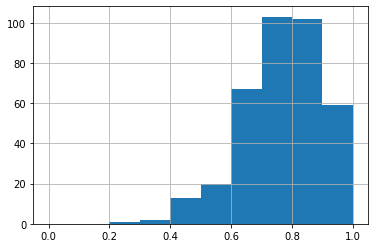

In [44]:
totPassData["passAccuracy"].hist(bins=[i/100 for i in range(0,101,10)])

In [45]:
#GroundPassData

In [48]:
gpData = eventsPassDataLaLiga2019[eventsPassDataLaLiga2019['pass.height.id']==1]

In [49]:
gpData.groupby('player.id').agg({'type.id':'count',
                                'pass.outcome.id': lambda x : (x.isnull().sum())})

,type.id,pass.outcome.id
player.id,,
2948.0,14,13.0
3042.0,73,67.0
3058.0,6,5.0
3122.0,6,6.0
3139.0,11,9.0
...,...,...
32953.0,2,2.0
34515.0,4,3.0
40881.0,35,35.0


In [50]:
gpPlayerData = gpData.groupby('player.id').agg({'type.id':'count',
                                'pass.outcome.id': lambda x : (x.isnull().sum())})

In [51]:
gpPlayerData.rename(columns={"type.id": "totGPasses",
                             "pass.outcome.id": "succGPasses"},
                    inplace=True)

In [52]:
gpPlayerData["gpAccuracy"] = gpPlayerData["succGPasses"].divide(gpPlayerData["totGPasses"])

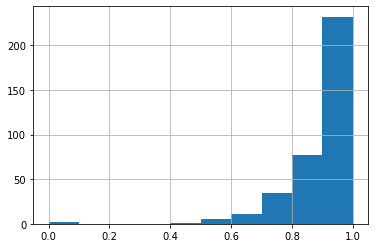

In [55]:
gpPlayerData["gpAccuracy"].hist(bins=[i/100 for i in range(0,101,10)])

In [56]:
#LowPassData

In [64]:
lpData = eventsPassDataLaLiga2019[eventsPassDataLaLiga2019['pass.height.id']==2]

In [65]:
lpPlayerData = lpData.groupby('player.id').agg({'type.id':'count',
                                'pass.outcome.id': lambda x : (x.isnull().sum())})

In [66]:
lpPlayerData.rename(columns={"type.id": "totLPasses",
                             "pass.outcome.id": "succLPasses"},
                    inplace=True)

In [67]:
lpPlayerData["lpAccuracy"] = lpPlayerData["succLPasses"].divide(lpPlayerData["totLPasses"])

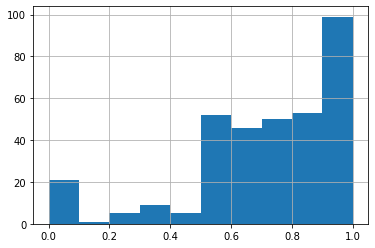

In [68]:
lpPlayerData["lpAccuracy"].hist(bins=[i/100 for i in range(0,101,10)])

In [69]:
#high Passes

In [72]:
hpData = eventsPassDataLaLiga2019[eventsPassDataLaLiga2019["pass.height.id"] == 3]

In [73]:
hpData.groupby(["player.id"]).agg({"type.id": "count",
                                   "pass.outcome.id": lambda x: (x.isnull()).sum()})

,type.id,pass.outcome.id
player.id,,
2948.0,2,0.0
3042.0,8,2.0
3122.0,1,1.0
3139.0,8,6.0
3141.0,6,3.0
...,...,...
32480.0,13,5.0
32670.0,10,4.0
34515.0,2,2.0


In [74]:
hpPlayerData = hpData.groupby(["player.id"]).agg({"type.id": "count",
                                                  "pass.outcome.id": lambda x: (x.isnull()).sum()})

In [75]:
hpPlayerData.rename(columns={"type.id": "totHPasses",
                             "pass.outcome.id": "succHPasses"},
                    inplace=True)

In [76]:
hpPlayerData["hpAccuracy"] = hpPlayerData["succHPasses"].divide(hpPlayerData["totHPasses"])

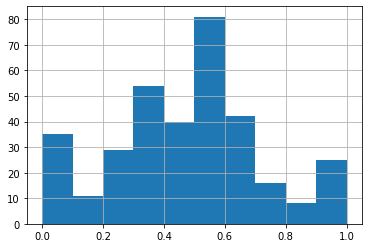

In [77]:
hpPlayerData['hpAccuracy'].hist(bins=[i/100 for i in range(0,101,10)])

In [78]:
#Under Pressure Data

In [82]:
eventsPassDataLaLiga2019[eventsPassDataLaLiga2019["under_pressure"].notnull()]

,match_id,id,index,period,timestamp,minute,second,possession,duration,type.id,...,shot.saved_off_target,goalkeeper.shot_saved_off_target,dribble.no_touch,goalkeeper.success_in_play,goalkeeper.lost_in_play,jersey_number,started,subID,minMinute,minsPlayed
100,303421,2d7bf141-e683-4d49-aa7a-efd756b5d559,101,1,01:44.7,1,44,3,0.973748,30,...,NaN,NaN,NaN,NaN,NaN,28.0,Yes,NaN,0.0,93.0
104,303421,bc28474b-89ab-44d3-90d6-93b3becda7ae,105,1,01:46.5,1,46,3,0.853673,30,...,NaN,NaN,NaN,NaN,NaN,22.0,Yes,NaN,0.0,93.0
128,303421,61103bd9-4f7c-4f37-8aa7-0094cdafe67f,129,1,02:00.3,2,0,3,1.262427,30,...,NaN,NaN,NaN,NaN,NaN,28.0,Yes,NaN,0.0,93.0
149,303421,485c7e0e-3767-49cb-abdd-091880c50944,150,1,02:23.0,2,22,3,1.246493,30,...,NaN,NaN,NaN,NaN,NaN,33.0,Yes,NaN,0.0,93.0
185,303421,fcee64b1-618e-46a7-ba97-c88025817455,186,1,02:56.4,2,56,3,1.568300,30,...,NaN,NaN,NaN,NaN,NaN,9.0,Yes,NaN,0.0,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128933,303731,6eb46c31-04b2-4b30-8ede-6771099ce5e1,3565,2,44:59.9,89,59,183,4.466763,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23808.0,65.0,26.0
128938,303731,be3064bc-759f-43a5-b3aa-688d37bb47e1,3570,2,45:06.8,90,6,184,1.145811,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8118.0,58.0,33.0
128948,303731,41b833e4-3c59-4310-b383-a4b1384a50a0,3580,2,45:14.8,90,14,184,1.723822,30,...,NaN,NaN,NaN,NaN,NaN,8.0,Yes,NaN,0.0,91.0
128965,303731,e0841d8a-1b9c-47f4-817f-7962d6f94918,3597,2,45:27.3,90,27,184,1.581832,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8118.0,58.0,33.0


In [83]:
upData = eventsPassDataLaLiga2019[eventsPassDataLaLiga2019["under_pressure"].notnull()]

In [84]:
upData.groupby(["player.id"]).agg({"type.id": "count",
                                   "pass.outcome.id": lambda x: (x.isnull()).sum()})

,type.id,pass.outcome.id
player.id,,
2948.0,3,2.0
3042.0,24,21.0
3058.0,1,1.0
3122.0,1,1.0
3139.0,4,4.0
...,...,...
32670.0,10,8.0
34515.0,3,3.0
40881.0,7,6.0


In [85]:
upPlayerData = upData.groupby(["player.id"]).agg({"type.id": "count",
                                                  "pass.outcome.id": lambda x: (x.isnull()).sum()})

In [86]:
upPlayerData.rename(columns={"type.id": "totPassesUP",
                             "pass.outcome.id": "succPassesUP"},
                    inplace=True)

In [87]:
upPlayerData["upAccuracy"] =\
    upPlayerData["succPassesUP"].divide(upPlayerData["totPassesUP"])

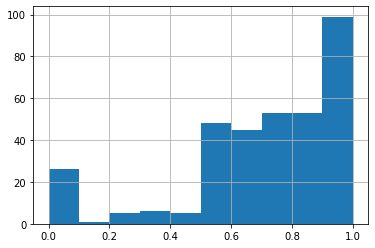

In [88]:
upPlayerData["upAccuracy"].hist(bins=[i/100 for i in range(0,101,10)])

In [89]:
#Through Ball Data

In [90]:
eventsPassDataLaLiga2019[eventsPassDataLaLiga2019["pass.through_ball"].notnull()]

,match_id,id,index,period,timestamp,minute,second,possession,duration,type.id,...,shot.saved_off_target,goalkeeper.shot_saved_off_target,dribble.no_touch,goalkeeper.success_in_play,goalkeeper.lost_in_play,jersey_number,started,subID,minMinute,minsPlayed
775,303421,4cb0f710-d189-4b1f-a074-5aefe2fdb552,776,1,16:03.3,16,3,30,2.849601,30,...,NaN,NaN,NaN,NaN,NaN,10.0,Yes,NaN,0.0,93.0
1163,303421,dab01ac2-a87c-4fcc-9a6a-f89545dfe4fa,1164,1,26:30.0,26,29,48,0.748404,30,...,NaN,NaN,NaN,NaN,NaN,28.0,Yes,NaN,0.0,93.0
1662,303421,ccbe91c7-ea64-44aa-9c52-8a653bc5b506,1663,1,40:09.7,40,9,73,1.459462,30,...,NaN,NaN,NaN,NaN,NaN,10.0,Yes,NaN,0.0,93.0
1717,303421,86944e15-8111-4645-93c7-49302e6da7a1,1718,1,42:04.2,42,4,78,0.890796,30,...,NaN,NaN,NaN,NaN,NaN,28.0,Yes,NaN,0.0,93.0
1800,303421,90265891-256d-48b1-ae45-92d34256f2ab,1801,1,43:16.0,43,16,80,1.169943,30,...,NaN,NaN,NaN,NaN,NaN,10.0,Yes,NaN,0.0,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127688,303731,6230b0d9-bcf8-46a2-b088-2700f8bcf67f,2320,2,07:57.9,52,57,102,2.270433,30,...,NaN,NaN,NaN,NaN,NaN,8.0,Yes,NaN,0.0,91.0
128186,303731,465950c1-bfda-4104-aa2e-b76bad29bf29,2818,2,21:57.6,66,57,148,1.382890,30,...,NaN,NaN,NaN,NaN,NaN,22.0,Yes,NaN,0.0,91.0
128378,303731,a24e9937-441c-4f3d-8bd3-f51fbd7c07d5,3010,2,27:52.4,72,52,157,3.016037,30,...,NaN,NaN,NaN,NaN,NaN,10.0,Yes,NaN,0.0,91.0
128631,303731,48b59408-dc33-4911-8547-17365af62e9f,3263,2,36:29.8,81,29,173,1.913051,30,...,NaN,NaN,NaN,NaN,NaN,4.0,Yes,NaN,0.0,91.0


In [91]:
tbData = eventsPassDataLaLiga2019[eventsPassDataLaLiga2019["pass.through_ball"].notnull()]

In [92]:
tbData.groupby(["player.id"]).agg({"type.id": "count",
                                   "pass.outcome.id": lambda x: (x.isnull()).sum()})

,type.id,pass.outcome.id
player.id,,
3042.0,2,0.0
3610.0,1,0.0
4447.0,1,0.0
4926.0,2,1.0
5203.0,25,13.0
...,...,...
25006.0,1,0.0
30225.0,2,0.0
30421.0,1,1.0


In [93]:
tbPlayerData = tbData.groupby(["player.id"]).agg({"type.id": "count",
                                   "pass.outcome.id": lambda x: (x.isnull()).sum()})

In [94]:
tbPlayerData.rename(columns={"type.id": "totPassesTB",
                             "pass.outcome.id": "succPassesTB"},
                    inplace=True)

In [95]:
tbPlayerData["tbAccuracy"] =\
    tbPlayerData["succPassesTB"].divide(tbPlayerData["totPassesTB"])

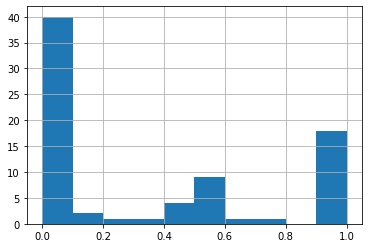

In [96]:
tbPlayerData["tbAccuracy"].hist(bins=[i/100 for i in range(0, 101, 10)])

In [97]:
#Misscommunication Data

NOTE: We will reject the **Miscommunication** parameter since there are only not enough data here (there are only 0.06% passes where a miscommunication has happened)

# Passing Ability Rating

In [99]:
""" Get Passing Ability Data """
# Join Total Passes df with Ground Passes df:
passingAbilityData = pd.merge(totPassData, gpPlayerData,
                           how="outer", left_index=True, right_index=True)

# Join Final Pass Ability df with Low Passes df:
passingAbilityData = pd.merge(passingAbilityData, lpPlayerData,
                           how="outer", left_index=True, right_index=True)

# Join Final Pass Ability df with High Passes df:
passingAbilityData = pd.merge(passingAbilityData, hpPlayerData,
                           how="outer", left_index=True, right_index=True)

# Join Final Pass Ability df with Under Pressure Passes df:
passingAbilityData = pd.merge(passingAbilityData, upPlayerData,
                           how="outer", left_index=True, right_index=True)

# Join Final Pass Ability df with Through Ball Passes df:
passingAbilityData = pd.merge(passingAbilityData, tbPlayerData,
                           how="outer", left_index=True, right_index=True)

In [100]:
passingAbilityData['paRating'] = \
(passingAbilityData["passAccuracy"]*0.08)\
.add(passingAbilityData['gpAccuracy']*0.02)\
.add(passingAbilityData["lpAccuracy"]*0.1)\
.add(passingAbilityData["hpAccuracy"]*0.15)\
.add(passingAbilityData["upAccuracy"]*0.25)\
.add(passingAbilityData["tbAccuracy"]*0.4)

In [101]:
passingAbilityData.loc[passingAbilityData["paRating"].nlargest(10).index]\
[["player.name", "team.name", "paRating"]]

,player.name,team.name,paRating
player.id,,,
5504.0,Éver Maximiliano David Banega,Sevilla,0.923488
6713.0,Diego Javier Llorente Ríos,Real Sociedad,0.886405
6866.0,Marc Roca Junqué,Espanyol,0.870504
5217.0,Iago Aspas Juncal,Celta Vigo,0.869558
5213.0,Gerard Piqué Bernabéu,Barcelona,0.864449
5574.0,Toni Kroos,Real Madrid,0.857502
8819.0,Alexander Isak,Real Sociedad,0.830492
8252.0,Martin Ødegaard,Real Sociedad,0.830383
30421.0,Matías Ezequiel Vargas Martín,Espanyol,0.826667


In [102]:
passingAbilityData[['passAccuracy', 'gpAccuracy',
                    'lpAccuracy', 'hpAccuracy',
                    'upAccuracy', 'tbAccuracy']] =\
    passingAbilityData[['passAccuracy', 'gpAccuracy',
                    'lpAccuracy', 'hpAccuracy',
                    'upAccuracy', 'tbAccuracy']].fillna(0)

In [103]:
passingAbilityData["paRating"] =\
    (passingAbilityData["passAccuracy"]*0.05)\
        .add(passingAbilityData["gpAccuracy"]*0.05)\
        .add(passingAbilityData["lpAccuracy"]*0.1)\
        .add(passingAbilityData["hpAccuracy"]*0.15)\
        .add(passingAbilityData["upAccuracy"]*0.25)\
        .add(passingAbilityData["tbAccuracy"]*0.4)

In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((1,10))

In [106]:
passingAbilityData["paRating"] =\
    scaler.fit_transform(np.array(passingAbilityData["paRating"]).reshape(-1, 1))

In [107]:
passingAbilityData.loc[passingAbilityData["paRating"].nlargest(10).index]\
[["player.name", "team.name", "paRating"]]

,player.name,team.name,paRating
player.id,,,
5504.0,Éver Maximiliano David Banega,Sevilla,10.000000
6713.0,Diego Javier Llorente Ríos,Real Sociedad,9.626465
6866.0,Marc Roca Junqué,Espanyol,9.480782
5217.0,Iago Aspas Juncal,Celta Vigo,9.443957
5213.0,Gerard Piqué Bernabéu,Barcelona,9.395464
5574.0,Toni Kroos,Real Madrid,9.339535
8252.0,Martin Ødegaard,Real Sociedad,9.073446
30421.0,Matías Ezequiel Vargas Martín,Espanyol,9.045710
8819.0,Alexander Isak,Real Sociedad,9.042476


In [108]:
passingAbilityData.to_csv('data/passingAbilityData.csv')

NameError: name 'pd' is not defined